# **Router**

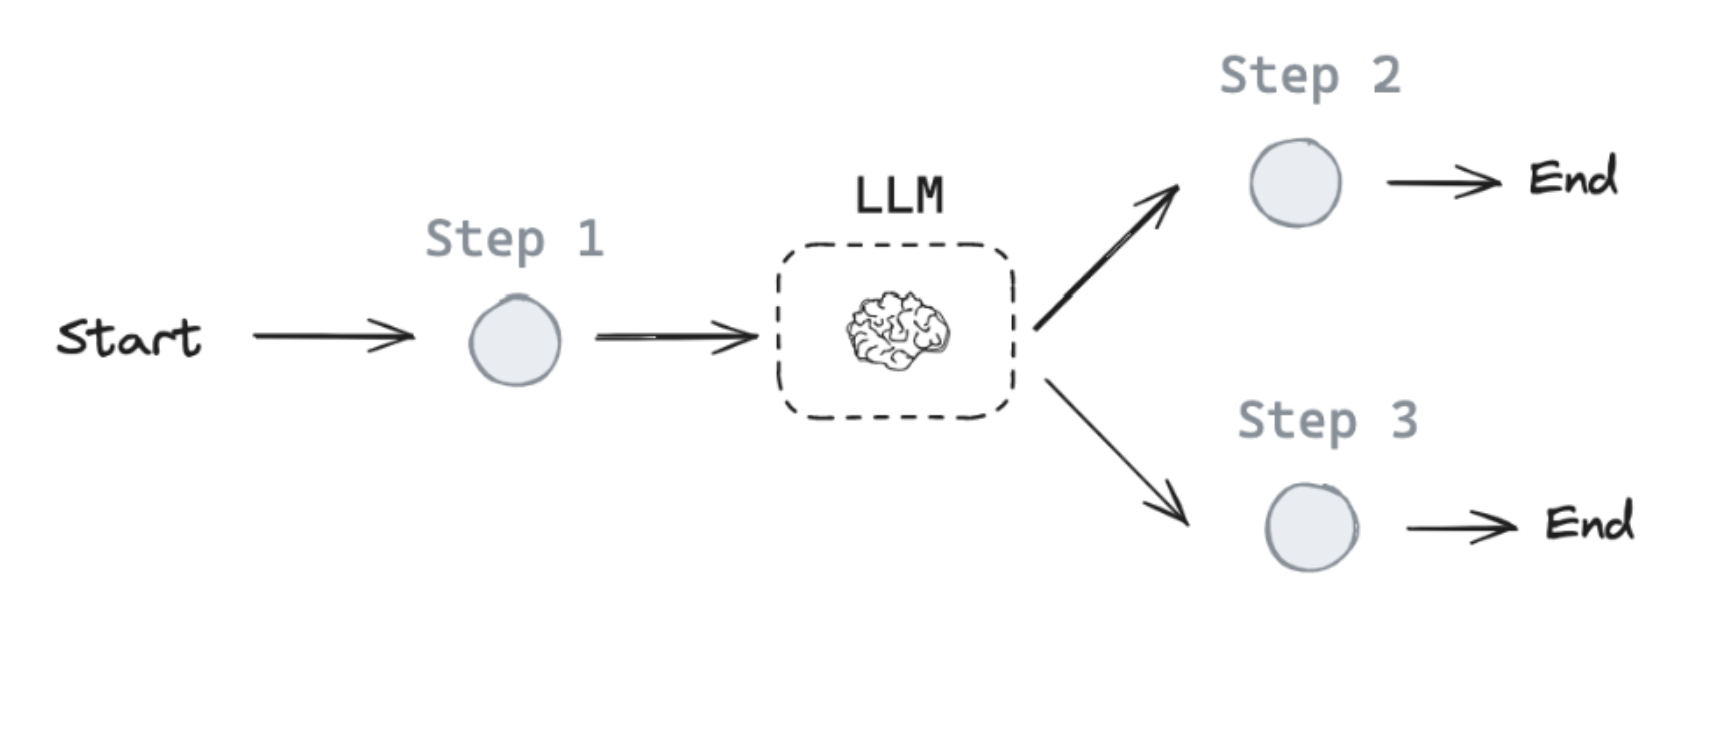

In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_google_genai langchain_core langgraph

In [2]:
import os
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"]=GOOGLE_API_KEY

In [3]:
def multiply(a: int, b: int) -> int:
  """
  Multiply a and b

  Args:
    a: first number
    b: second number

  Returns:
    response: a * b
  """
  return a * b

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
model.invoke("Hello")

AIMessage(content='Hello! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-aaeaae1d-6b55-4635-b4ad-2a56274f25b9-0', usage_metadata={'input_tokens': 1, 'output_tokens': 10, 'total_tokens': 11, 'input_token_details': {'cache_read': 0}})

In [5]:
# Model with tools
model_with_tool = model.bind_tools([multiply])

# **AI Agent Architecture**

In [7]:
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition

In [8]:
# Creating Model with tool node
def call_model_with_tool(state: MessagesState) -> MessagesState:
  return {"messages": [model_with_tool.invoke(state["messages"])]}

In [10]:
# Buidling the graph
builder = StateGraph(MessagesState)

# Add Node
builder.add_node("call_model_with_tool", call_model_with_tool)
builder.add_node("tools", ToolNode([multiply]))

# Add Edge
builder.add_edge(START, "call_model_with_tool")
builder.add_conditional_edges(
    "call_model_with_tool",
    tools_condition
)
builder.add_edge("tools", END)

# Compile graph
graph = builder.compile()

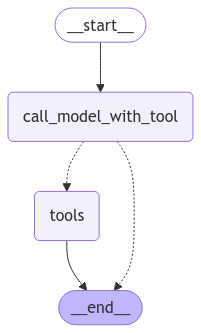

In [11]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
# Invoke
messages = graph.invoke({"messages": ["Multiply two with three"]})
for msg in messages["messages"]:
  msg.pretty_print()

================================ Human Message =================================

Multiply two with three
================================== Ai Message ==================================
Tool Calls:
  multiply (c09348a5-11f9-46e9-8d6f-a94e646ef9c3)
 Call ID: c09348a5-11f9-46e9-8d6f-a94e646ef9c3
  Args:
    a: 2.0
    b: 3.0
================================= Tool Message =================================
Name: multiply

6
